In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("G:\CS109\data\polynomial50.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\josep\AppData\Local\Temp\ipykernel_26588\2084515539.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("G:\CS109\data\polynomial50.csv")


In [6]:
df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


Visualizing the data

In [7]:
from sklearn.preprocessing import normalize

x = normalize(df[["x"]].values, norm="l1", axis=0)

# # print(x.sum())
# x = df[["x"]].values

# x = (x-np.mean(x)) / np.std(x)
# # print(x.sum())


y = df["y"].values
f = df["f"].values

Text(0, 0.5, 'Predictor - $Y$')

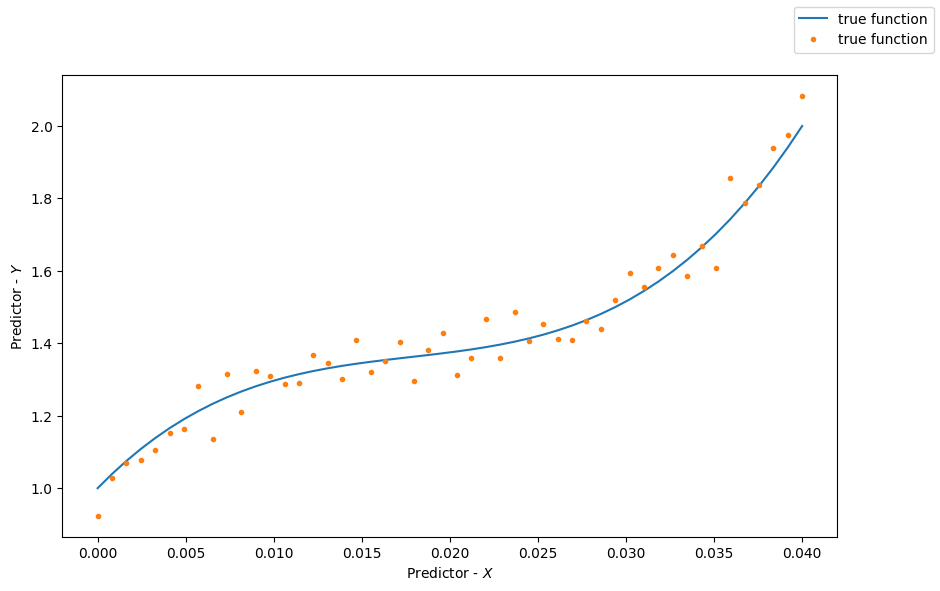

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x,f, "-", label = "true function")
ax.plot(x,y, ".", label = "true function")

fig.legend()
ax.set_xlabel("Predictor - $X$")
ax.set_ylabel("Predictor - $Y$")

Step 1: Split data into train and validation split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=0.8)

In [10]:
# Set degree of polynomial
degree = 3

# Set range of tuning parameters
alphas = np.logspace(start=10, stop=-50, num=20, base=10)

training_error, validation_error = [],[]

# store models for later plotting
estimator = []


# Iterate through each alpha, and calculate the training and validation errors for each
for alpha in alphas:

    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree=degree).fit_transform(x_val)

    ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
    ridge_reg.fit(x_poly_train, y_train)

    y_train_pred = ridge_reg.predict(x_poly_train)
    y_val_pred = ridge_reg.predict(x_poly_val)

    training_mse = mean_squared_error(y_train, y_train_pred)
    validation_mse = mean_squared_error(y_val, y_val_pred)

    training_error.append(training_mse)
    validation_error.append(validation_mse)
    estimator.append(ridge_reg)


    # plot the results
    # plot the regression 




In [11]:
best_index = training_error.index(min(training_error))
best_estimator = estimator[best_index]

In [12]:
estimator_coef_list = []

for est in estimator:
    estimator_coef_list.append(est.coef_)

estimator_coef_df  = pd.DataFrame(estimator_coef_list)

estimator_coef_df

,0,1,2,3
0,5.694773e-09,1.254092e-10,3.528229e-12,1.094167e-13
1,8.191598e-06,1.803939e-07,5.075155e-09,1.573897e-10
2,1.168650e-02,2.575296e-04,7.247514e-06,2.248044e-07
3,1.312318e+00,5.659361e-02,1.954319e-03,6.802788e-05
4,1.160684e+00,1.297229e+01,5.823425e-01,2.399063e-02
5,1.067611e+00,1.557868e+01,7.428354e+01,6.644172e+00
6,1.113465e+00,9.893120e+00,1.097499e+02,3.035251e+03
7,9.537468e-01,5.915893e+01,-2.988957e+03,5.497347e+04
8,9.516986e-01,5.979043e+01,-3.028667e+03,5.563893e+04
9,9.516971e-01,5.979087e+01,-3.028694e+03,5.563939e+04


Text(0, 0.5, 'coefficient')

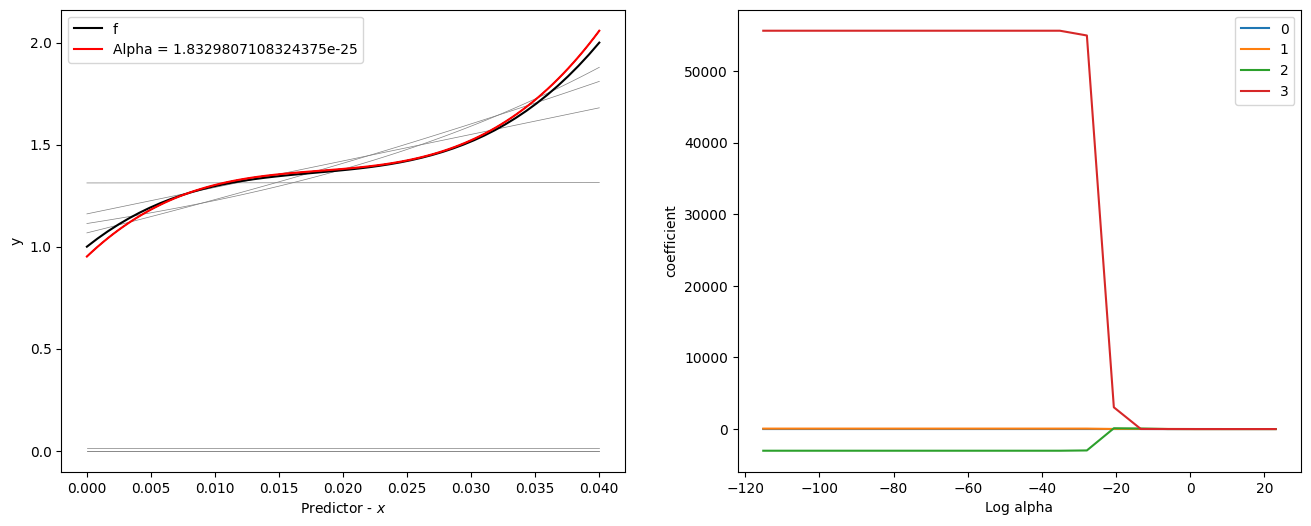

In [13]:
fig, row = plt.subplots(1, 2, figsize=(16,6))

left, right = row

transx = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
transX = PolynomialFeatures(degree).fit_transform(transx)

for i, alpha in enumerate(alphas):

    left.plot(transx, estimator[i].predict(transX), color = "grey", linewidth=0.5)


# plot the true line
left.plot(x,f, "black",label="f")
left.plot(transx, best_estimator.predict(transX), color="red", label = f"Alpha = {alphas[best_index]}")
left.set_xlabel("Predictor - $x$")
left.set_ylabel("y")
left.legend()


# plot how each coefficient changes as alpha increases

right.plot(np.log(alphas),estimator_coef_df)
right.legend(estimator_coef_df.columns)
right.set_xlabel("Log alpha")
right.set_ylabel("coefficient")